# radial basis function neural networks(RBFNNs)

In [1]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from sympy import *
from sympy.utilities.lambdify import lambdify
import matplotlib.figure
init_printing()
#from math import *
from interval import interval, inf
from interval import imath
import sys
from pprint import pprint
import datetime
import os

In [2]:
! echo '' > find_all_solution.out
from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import (
    NelderMead,
)

## $NN(x_1, x_2) = exp(-4(x_1 - 1)^2  -  6(x_2 - 0.5)^2) + exp(-7(x_1+1.5)^2 - 9(x_2+1)^2)$
where $x_1 \in [-2,2], x_2 \in [-2,2]$

### グラフの可視化

In [3]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_expr = exp(-4*(x_1-1)**2 - 6*(x_2-0.5)**2) + exp(-7*(x_1+1.5)**2 - 9*(x_2+1)**2)
f_expr = - f_expr

args = (x_1, x_2)
f_func = lambdify(args, f_expr, modules=imath)
f = fmat([[f_func]])

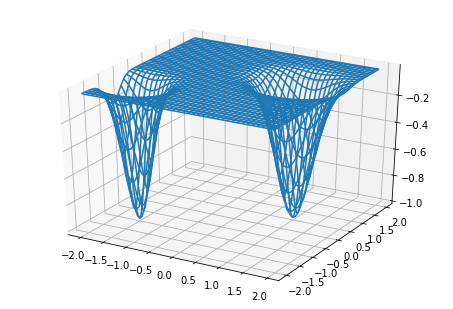

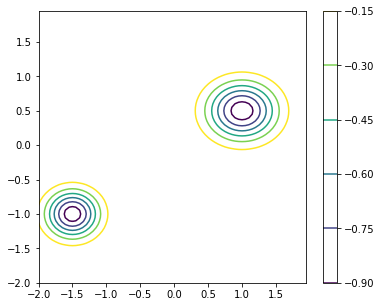

In [4]:
x = np.arange(-2, 2, 0.05) 
y = np.arange(-2, 2, 0.05) 

X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis]
Z = np.array([ip.mid(f(_args))[0][0] for _args in args_list]).reshape(X.shape)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) 
plt.show()

fig = plt.figure(figsize=(6, 5))
im =plt.contour(X, Y, Z, shading='gouraud')
fig.colorbar(im)

## local minimaを求める

In [5]:
np_func = lambdify([args], f_expr, modules=np)
# seed_num = 324
# np.random.seed(seed_num)
low = -2
high = 2
points = np.random.uniform(low=low, high=high, size=(3,2))
nelder = NelderMead(np_func, points)
# for i in range(1, 50+1):
#     nelder.update_points()
# local_minima = nelder.func(nelder.points[0])
# print local_minima

local_minima, points_history = nelder.run()
x = np.arange(-2, 2, 0.05) 
y = np.arange(-2, 2, 0.05) 
X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis].tolist()
Z = np.array([-nelder.func(_args) for _args in args_list]).reshape(X.shape)

nelder.save_figs(X, Y, Z, points_history)

Start saveing images in nelder_mead_image/20180103_075609 dirctory.
Finish saveing images in nelder_mead_image/20180103_075609 dirctory.


### Krawczyk method

In [6]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

#### global minma

In [7]:
x_1 = interval[-2, 2]
x_2 = interval[-2, 2]


X = ip([[x_1],[x_2]])


kra = Krawczyk(df, ddf, X)

cnt_max = 2000
max_width = 1e-4
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
    f, tmp_min_sup=local_minima, trace=False, cnt_max=cnt_max, max_width=max_width)

# ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
#     f, tmp_min_sup=f_val[0][0][0].sup ,trace=False, cnt_max=cnt_max, max_width=max_width)

# ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_all_solution(
#     trace=False, cnt_max=cnt_max, max_width=max_width)

# print '#####'*10
# pprint(ans_boxes)

[[interval([0.99933521701104, 1.0001394630461082])], [interval([0.4993361023398976, 0.5001295477335705])]]
[[interval([-1.5000000000035767, -1.4999999999610927])], [interval([-1.0000000000377487, -0.9999999998489633])]]
Loop end. cnt:36, len(S):0, len(T):2, len(U):0

36
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([0.9999999999999998, 1.0000000000000002])],
  [interval([0.49999999999999994, 0.5000000000000001])]],
 [[interval([-1.5000000000000002, -1.4999999999999998])],
  [interval([-1.0000000000000002, -0.9999999999999998])]]]
最小値の上限値: -1.0


## 探索の可視化

In [8]:
visualize_optimization_log(kra, f, animation_box)

Start saveing images in image/20180103_075631 dirctory.
Finish saveing images in image/20180103_075631 dirctory.
